In [1]:
import os, shutil, PIL
original_dataset_dir = '../data/primary_small/'
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'valid')
test_dir = os.path.join(original_dataset_dir, 'test')

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid'))

Using TensorFlow backend.


ImportError: No module named tensorflow

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical')

Found 5600 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [6]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 78s 783ms/step - loss: 1.8567 - acc: 0.2450 - val_loss: 1.7206 - val_acc: 0.2810
Epoch 2/30
100/100 [==============================] - 78s 780ms/step - loss: 1.7824 - acc: 0.2725 - val_loss: 1.6608 - val_acc: 0.3040
Epoch 3/30
100/100 [==============================] - 79s 787ms/step - loss: 1.7544 - acc: 0.2735 - val_loss: 1.4196 - val_acc: 0.2810
Epoch 4/30
100/100 [==============================] - 77s 772ms/step - loss: 1.7257 - acc: 0.2910 - val_loss: 1.8479 - val_acc: 0.2570
Epoch 5/30
100/100 [==============================] - 78s 783ms/step - loss: 1.7362 - acc: 0.2810 - val_loss: 1.7224 - val_acc: 0.3040
Epoch 6/30
100/100 [==============================] - 77s 770ms/step - loss: 1.6931 - acc: 0.2960 - val_loss: 1.6691 - val_acc: 0.3210
Epoch 7/30
100/100 [==============================] - 78s 775ms/step - loss: 1.6990 - acc: 0.3045 - val_loss: 1.5895 - val_acc: 0.2950
Epoch 8/30
100/100 [==============================] - 7

In [1]:
model.save('seti_small_1.h5')

NameError: name 'model' is not defined

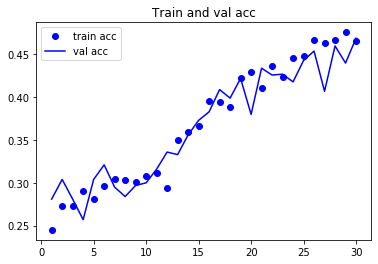

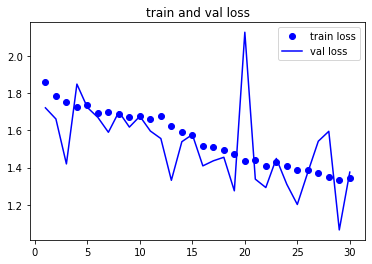

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs,val_acc, 'b', label='val acc')
plt.title('Train and val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs,val_loss, 'b',label='val loss')
plt.title('train and val loss')
plt.legend()

plt.show()

  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
